## Week 04 Exercises
4.1
Let's start with some basic practice using the shapely package. Do the following steps:

1 -Create a polygon from the following points: (-118.4152,33.9699), (-118.4152,33.9689),(-118.4144,33.9689),(-118.4143, 33.96890),(-118.4142,33.96990,9-118.4152,33.9699)
2 - Create a new variable that stores both x and y coordinates
3 - What is the centroid of this polygon?
4 - What is the bounding box? Write an explanation of what the bounding box actual means relative to the polygon.

In [1]:
from shapely import geometry
p1 = geometry.Point(-118.4152,33.9699)
p2 = geometry.Point(-118.4152,33.9689)
p3 = geometry.Point(-118.4144,33.9689)
p4 = geometry.Point(-118.4142,33.96990)
p5 = geometry.Point(-118.4152,33.9699)
pointList = [p1, p2, p3, p4, p5]

poly = geometry.Polygon(pointList)

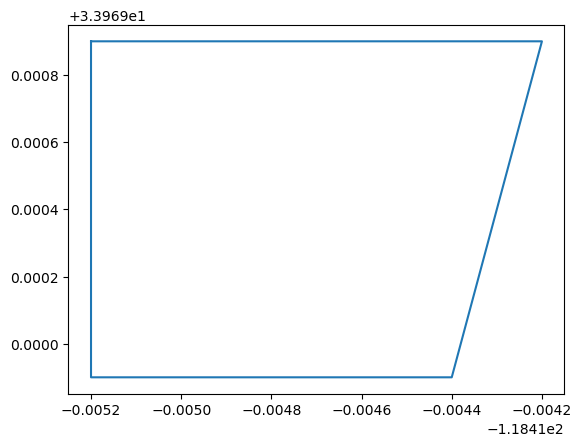

In [2]:
import matplotlib.pyplot as plt

x,y = poly.exterior.xy
plt.plot(x,y)


In [3]:
centroid_polygon = poly.centroid 
print(centroid_polygon)

POINT (-118.4147481481481 33.96941851851852)


A bounding box in essence, is a rectangle that surrounds an object, that specifies its position, class(eg: car, person) and confidence(how likely it is to be at that location). Bounding boxes are mainly used in the task of object detection, where the aim is identifying the position and type of multiple objects in the image.

In [4]:
bounding_box = poly.bounds
bounding_box

(-118.4152, 33.9689, -118.4142, 33.9699)

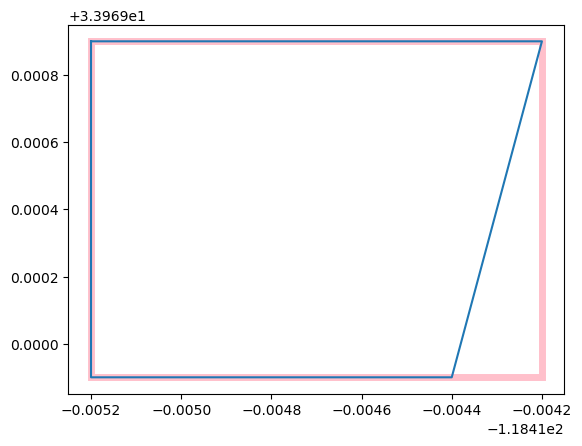

In [5]:
(minx, miny, maxx, maxy) = bounding_box

fig, ax = plt.subplots()
rect = plt.Rectangle((minx, miny), width = (maxx-minx), height = (maxy-miny), fill=False, edgecolor = 'pink',lw=5)
ax.add_patch(rect)

x,y = poly.exterior.xy
plt.plot(x,y)
plt.show()

## 4.2
Now let's move on with practicing using geopandas and working with various CRS. We will use the County of Los Angeles Justice Equity Need Index (by zip code). Some information on the dataset: The Justice Equity Need Index (JENI) identifies ZIP Codes in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices. Updated 2022.

The Justice Equity Need Index (JENI), by Advancement Project California, offers a means to map out the disparate burden that criminalization and a detention-first justice model place on specific communities. The index includes the following indicators:

System Involvement: The system-involved population by ZIP Code results in direct needs for justice equity, as measured by adult and youth probation.
Indicators: Adult Probation (per 1,000 people); Youth Probation (per 1,000 people)
Inequity Drivers: Root inequities across communities that contribute to racial and economic disparities as seen in incarceration and policing.
Indicators: Black, Latinx, AIAN, and NHPI Percentages of Population (average percentile); Unemployment Rate (%); Population aged 25+ without a High School Diploma (%); Population below 200% of the Federal Poverty Level (%); Violent Crime Rate (per 1,000 people)
Criminalization Risk: Conditions where the criminal justice system has historically taken a detention-first, prevention-last approach.
Indicators: Mental Health Hospitalizations (per 1,000 people); Substance Use-Related Hospitalizations (per 1,000 people); Homelessness Rate (per 1,000 people)
Learn more at https://www.advancementprojectca.org/tools-we-use/maps-and-data/justice-equity-need-index.

Supervisorial Districts, SPAs, and CSAs determined by ZIP Code centroid.

Complete the following tasks:

Load the dataset as a geopandas dataframe. The data is located under 'data/Justice_Equity_Need_Index.geojson'
What is the default CRS? Write a sentence about what type of CRS it is.
Remember, geopandas is just the spatial version of pandas with lots of the same functionality. Knowing some commands from pandas from previous exercises, answer the following:
What is the size of the dataframe?

List the column names.

Show the first 10 rows of the dataframe.

Make a copy of the dataframe.
Reproject the CRS is epsg:3857

Use matplotlib to graph BOTH versions of the dataframe, in the original CRS and in the new reprojected CRS. Make sure to use clear titles

Write a few sentences of differences you see in the visualizations between the two.

In [6]:
import geopandas as gpd

In [7]:
fp = "C:/Users/armen/Desktop/CIVL698/Justice_Equity_Need_Index.geojson"
data = gpd.read_file(fp)

2 - What is the default CRS? Write a sentence about what type of CRS it is.

In [8]:
print(data.crs)

EPSG:4326


the defualt crs of geopandas is EPSG 4326. It's the World Geodetic System (WGS84). WGS 84 is the standard U.S.
Department of Defense definition of a global reference system for geospatial information and is
the reference system for the Global Positioning System (GPS)

## 3rd Question

In [9]:
print(data.size)

5058


In [10]:
print(data.shape)

(281, 18)


In [11]:
columns = data.columns
print(columns)

Index(['OBJECTID', 'zip', 'jenicategory', 'jenipctl', 'jenirank',
       'riskcategory', 'riskpctl', 'driverscategory', 'driverspctl',
       'systemcategory', 'systempctl', 'neighborhood', 'sup_dist', 'spa',
       'csa', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')


In [12]:
data.head(10)

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."
5,6,90077,Lowest,1.8,272,Lowest,2.5,Lowest,13.6,Lowest,1.4,Bel-Air,District 3,SPA 5 - West,Los Angeles - Bel Air,0.268660,0.001831,"MULTIPOLYGON (((-118.45549 34.13449, -118.4555..."
6,7,91436,Lowest,2.2,271,Lowest,10.4,Lowest,5.4,Lowest,2.5,Encino,District 3,SPA 2 - San Fernando,Los Angeles - Encino,0.232985,0.001614,"MULTIPOLYGON (((-118.49296 34.18609, -118.4929..."
7,8,90094,Lowest,2.5,270,Lowest,9.0,Lowest,6.5,Lowest,4.7,Playa Vista,District 2,SPA 5 - West,Los Angeles - Playa Vista,0.152547,0.000306,"MULTIPOLYGON (((-118.40129 33.98378, -118.4008..."
8,9,91007,Lowest,2.9,269,Lowest,3.2,Lowest,10.0,Lowest,6.9,Arcadia,District 5,SPA 3 - San Gabriel,City of Arcadia,0.212972,0.001380,"MULTIPOLYGON (((-118.05051 34.14841, -118.0500..."
9,10,90049,Lowest,3.3,268,Lowest,13.6,Lowest,2.5,Lowest,4.3,Brentwood,District 3,SPA 5 - West,Los Angeles - Brentwood,0.395030,0.003870,"MULTIPOLYGON (((-118.48933 34.13154, -118.4886..."


In [18]:
orig = data.copy()

In [16]:
data_projected = data.to_crs("EPSG:3857")
data_projected.head()


,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-13147794.179 4047256.800, -13..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-13129326.139 4025429.029, -13..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-13179177.697 4002548.915, -13..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-13224787.024 4048688.878, -13..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-13179462.784 3993751.501, -13..."


In [15]:
import matplotlib.pyplot as plt

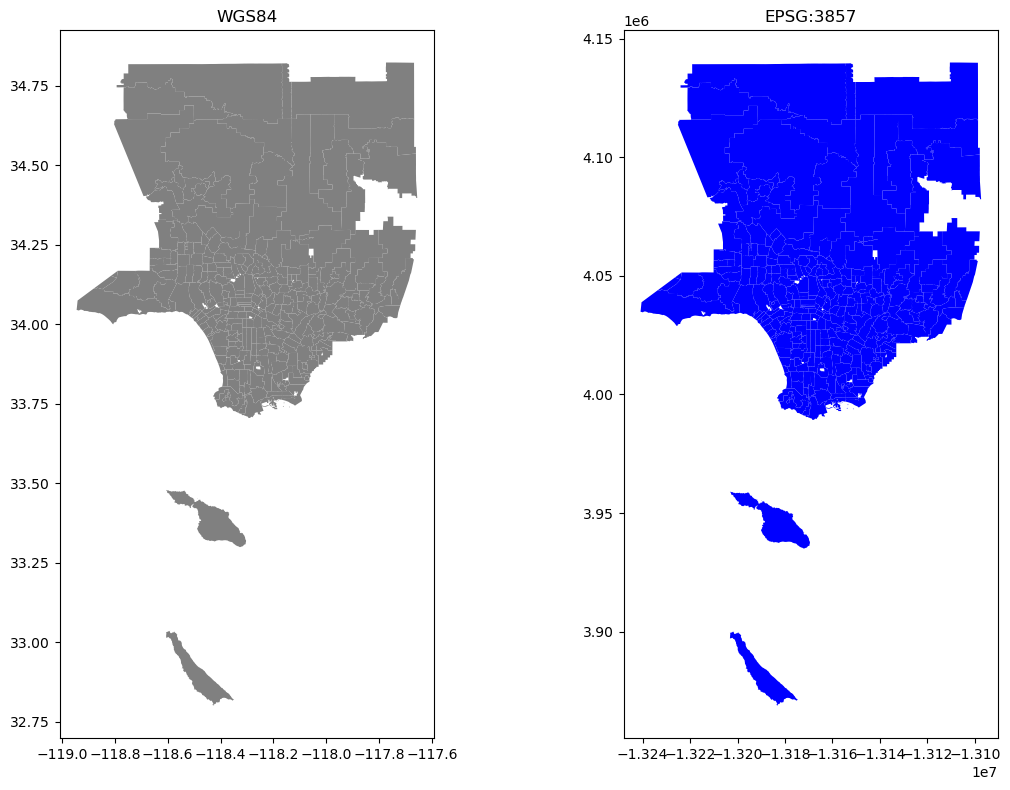

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
data.plot(ax=ax1, facecolor='gray');

# Add title
ax1.set_title("WGS84");

# Plot the one with ETRS-LAEA projection
data_projected.plot(ax=ax2, facecolor='blue');

# Add title
ax2.set_title("EPSG:3857");

# Remove empty white space around the plot
plt.tight_layout()

The data in Open Street Map database is stored in a gcs with units decimal degrees & datum of wgs84. (EPSG: 4326)

The Open Street Map tiles and the WMS webservice, are in the projected coordinate system that is based on the wgs84 datum. (EPSG 3857)
EPSG:4326 is in degrees - 3D sphere

EPSG:3857 is in metres - 2D projection

I'm not seeing any differences in the visualizations besides the x and y axis.